<a href="https://colab.research.google.com/github/Galacticocr/Fraudulentas/blob/main/Tarea2_Junio_2026_modelo_transacciones_fraudulentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"creditcard.csv"

## Data loading

### Subtask:
Load the credit card dataset.


**Reasoning**:
Load the credit card dataset into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('creditcard.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the file is accessible.")
except Exception as e:
    print(f"An error occurred: {e}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)


## Data exploration

### Subtask:
Explore the credit card transaction dataset.


**Reasoning**:
I need to explore the dataset by examining data types, missing values, descriptive statistics, distributions, and potential outliers.



Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Descriptive S

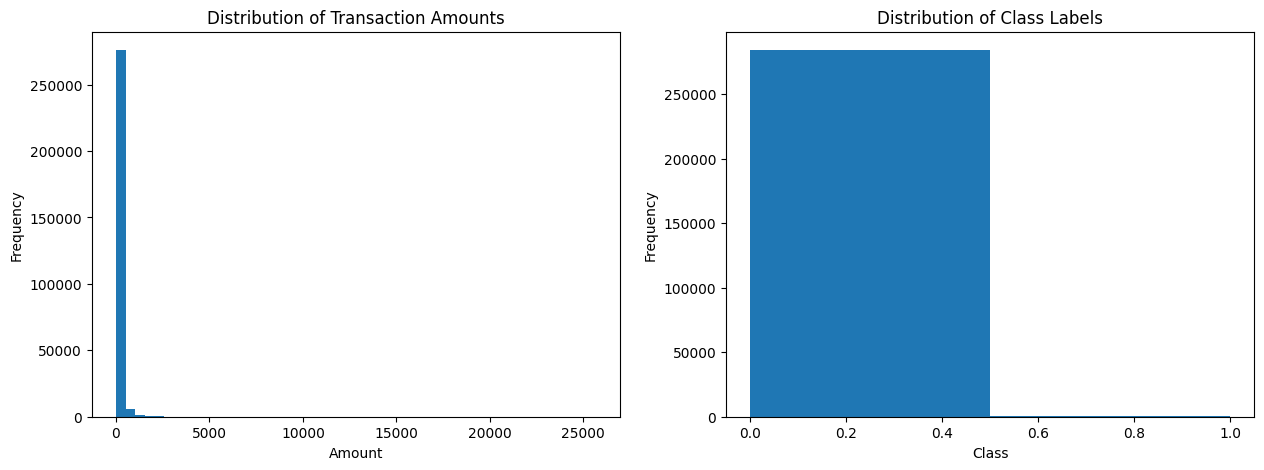

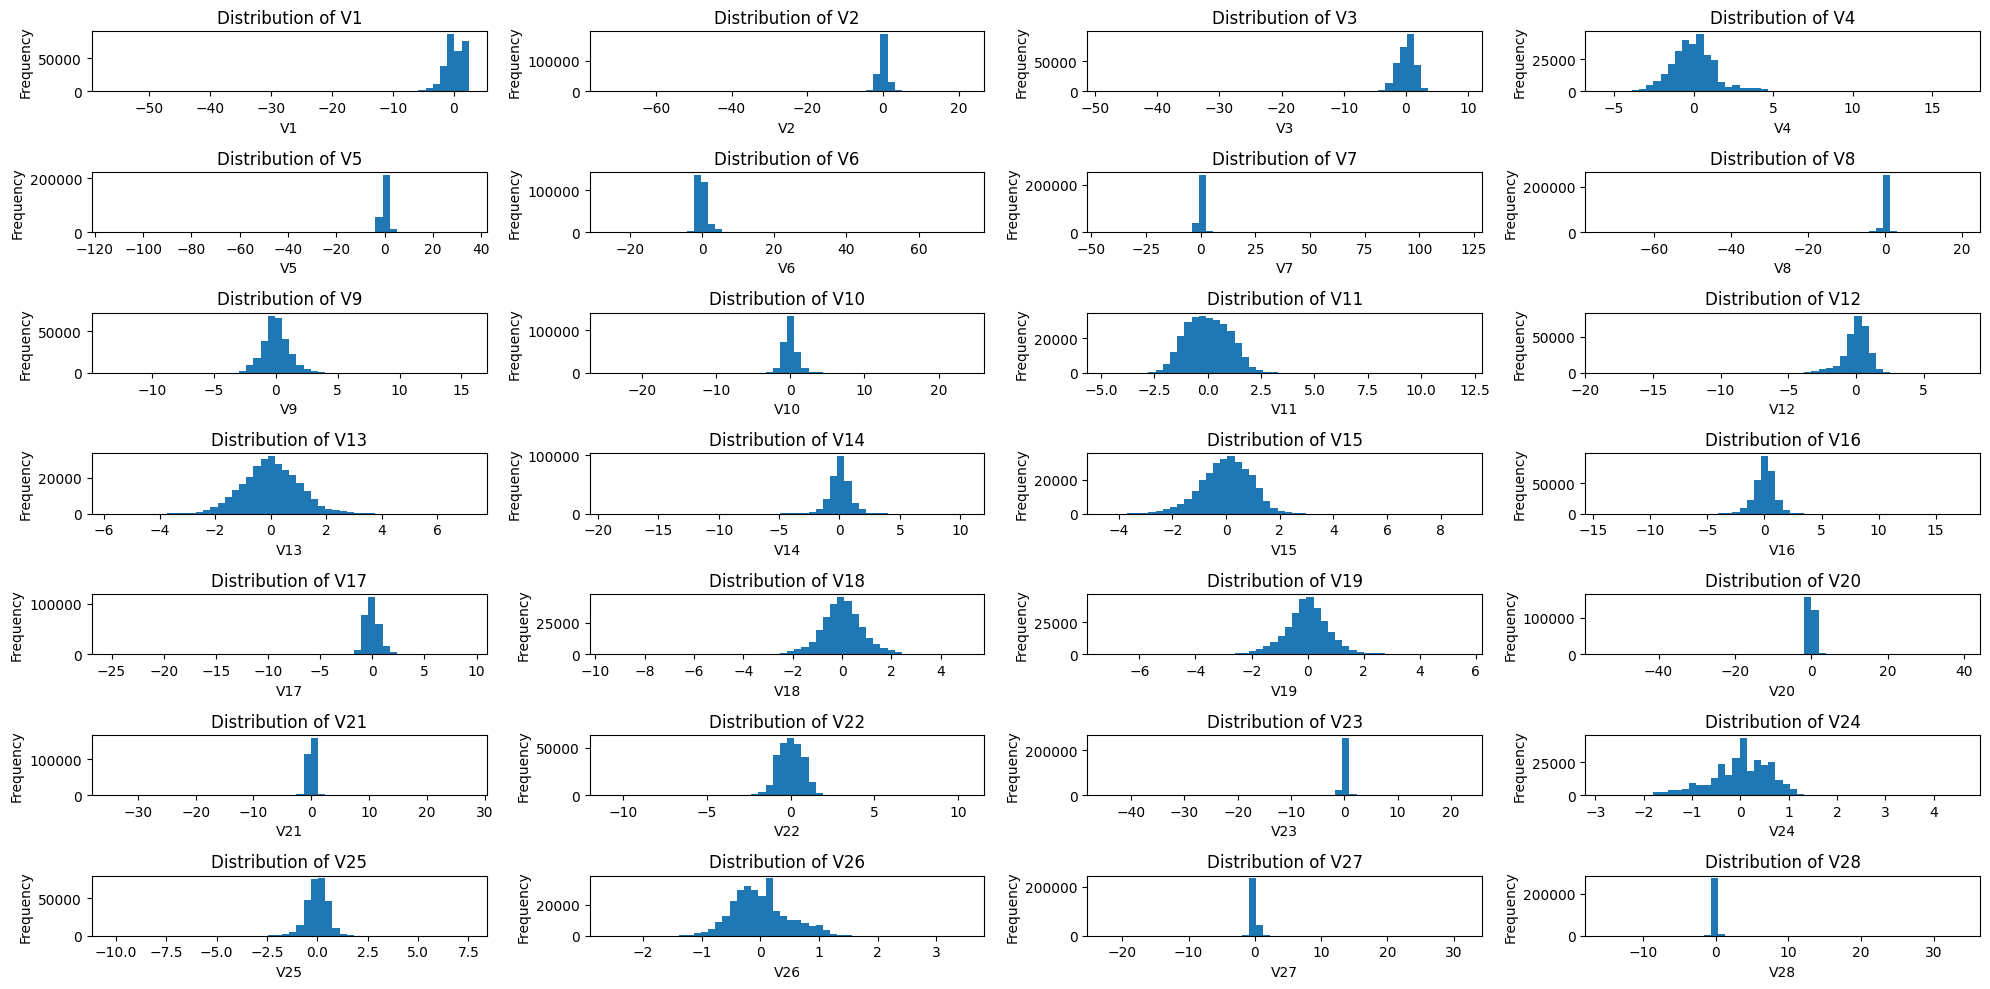


Shape of the data: (284807, 31)


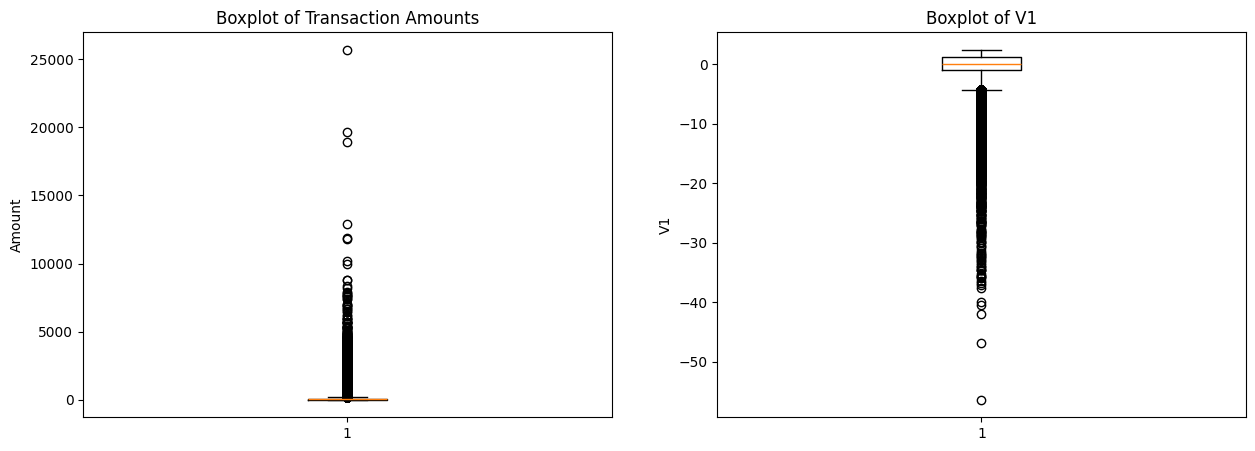

In [ ]:
# Examine data types
print("Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Analyze distributions using histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')

plt.subplot(1, 2, 2)
plt.hist(df['Class'], bins=2)  # Class is binary, so only 2 bins are needed
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.show()

# Distribution of V1 to V28
plt.figure(figsize=(20, 10))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    plt.hist(df[f'V{i}'], bins=50)
    plt.xlabel(f'V{i}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()


# Shape of the data
print(f"\nShape of the data: {df.shape}")


# Identify potential outliers using box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Amount'])
plt.ylabel('Amount')
plt.title('Boxplot of Transaction Amounts')


plt.subplot(1, 2, 2)
plt.boxplot(df['V1'])
plt.ylabel('V1')
plt.title('Boxplot of V1')
plt.show()

#Outlier detection for other V features can be added similarly.

## Data cleaning

### Subtask:
Clean the credit card transaction data.


**Reasoning**:
Handle outliers in 'Amount' and 'V1'-'V28' using the IQR method, then scale the numerical features using StandardScaler. Generate boxplots and histograms to verify the changes.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Calculate IQR for 'Amount' and V features
numerical_features = ['Amount'] + [f'V{i}' for i in range(1, 29)]
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df[numerical_features] = np.clip(df[numerical_features], lower_bound, upper_bound)

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the impact of outlier handling and scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    plt.hist(df[col], bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

# Display descriptive statistics
display(df.describe())

ValueError: Must specify axis=0 or 1

**Reasoning**:
The error `ValueError: Must specify axis=0 or 1` arises because `np.clip` is used on a DataFrame slice, which is a Series.  `np.clip` expects a NumPy array.  The fix is to apply `np.clip` to each column individually.  Also, the original code was trying to use `np.clip` with Series for lower_bound and upper_bound, which are also Series.  This should also be fixed.



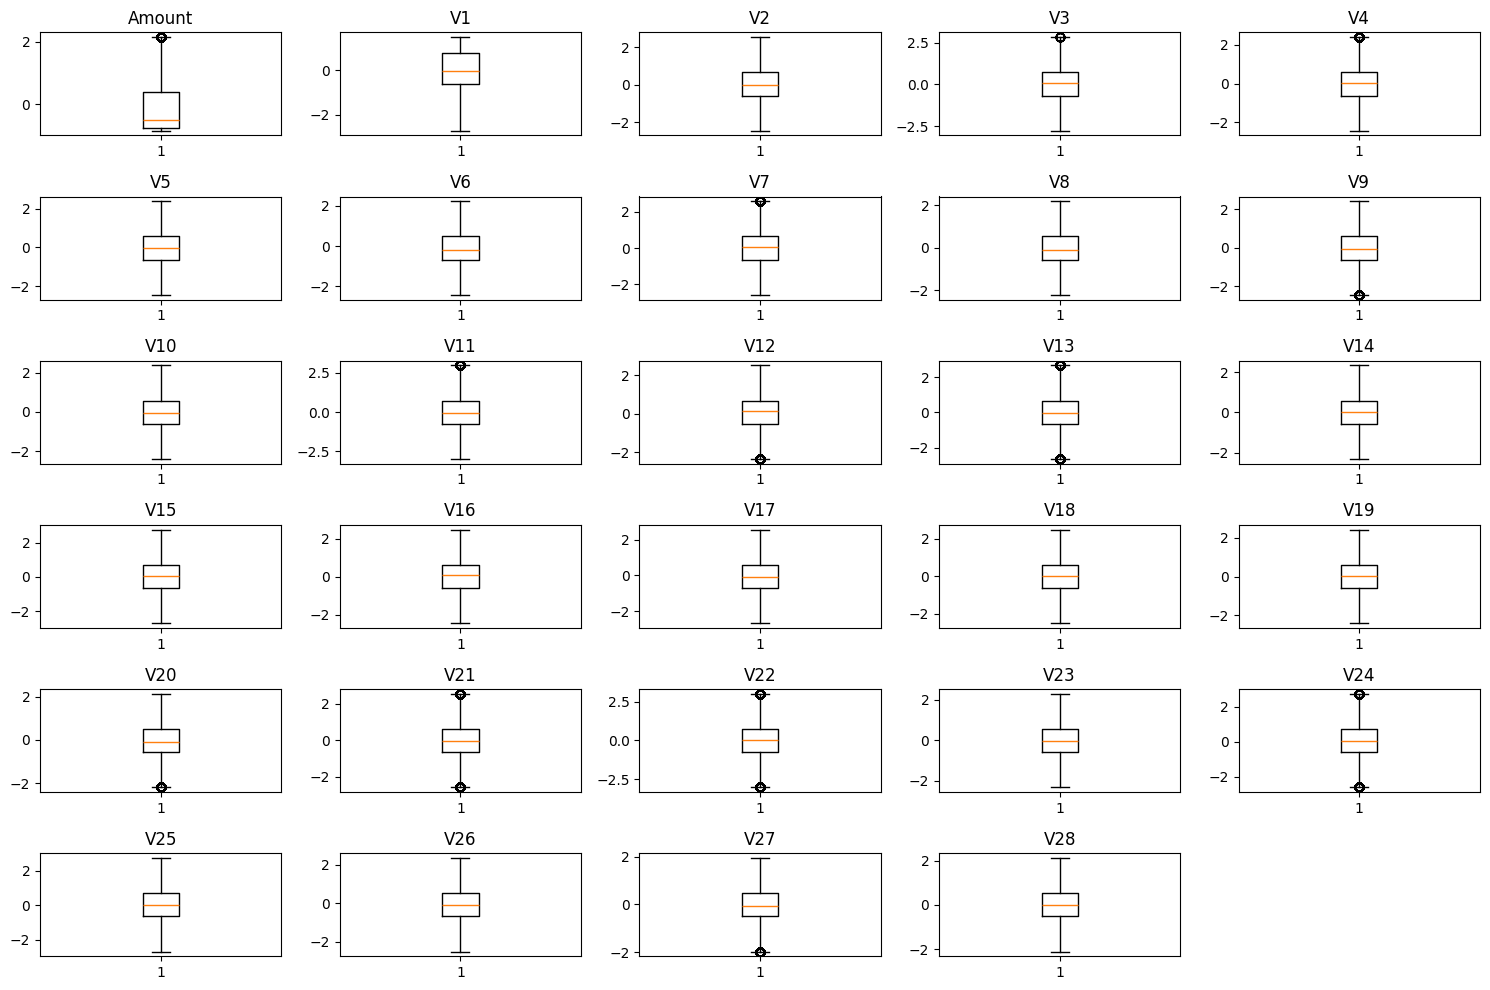

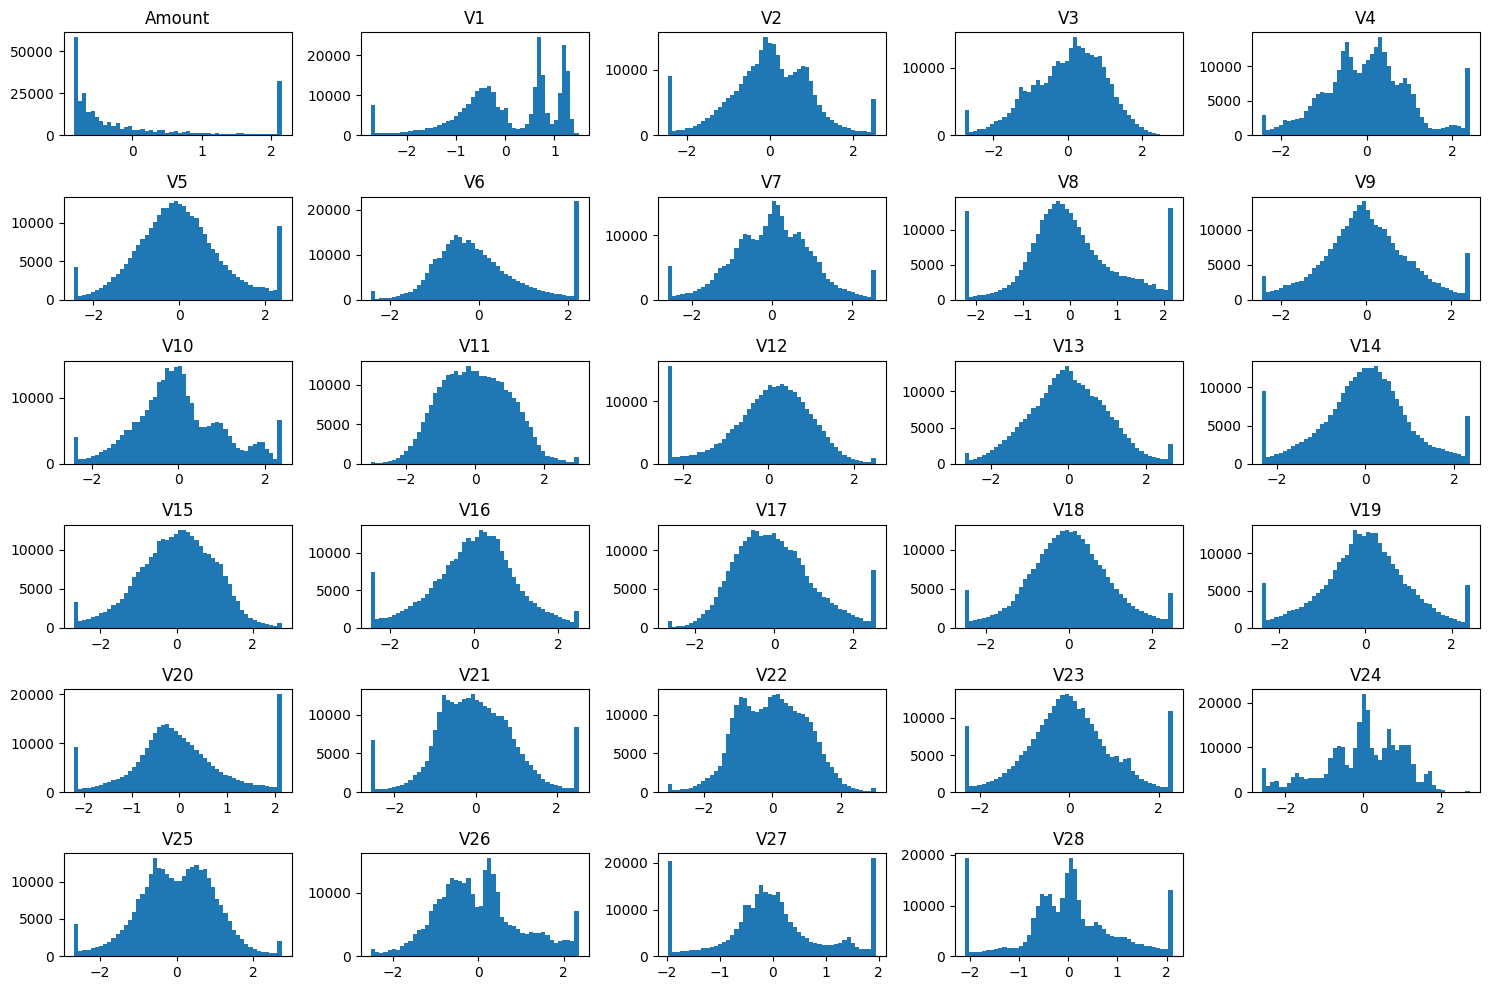

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,-2.155526e-17,-7.983430e-18,5.109395e-17,3.432875e-17,6.546413e-17,-2.434946e-17,2.315195e-17,-3.073621e-17,2.068207e-17,...,-2.195443e-17,8.382602e-18,7.983430e-18,-1.756355e-17,-7.983430e-18,8.906514e-18,-1.576727e-17,-1.876106e-17,3.025720e-16,0.001727
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,0.000000,-2.727619e+00,-2.452675e+00,-2.768520e+00,-2.448244e+00,-2.454646e+00,-2.421513e+00,-2.600186e+00,-2.226408e+00,-2.443198e+00,...,-2.578846e+00,-3.040158e+00,-2.327957e+00,-2.604531e+00,-2.683346e+00,-2.511886e+00,-1.975267e+00,-2.099288e+00,-8.387109e-01,0.000000
25%,54201.500000,-6.244774e-01,-5.780832e-01,-6.695549e-01,-6.262782e-01,-6.395075e-01,-6.757497e-01,-6.505582e-01,-5.708267e-01,-6.163748e-01,...,-6.583048e-01,-7.693013e-01,-5.889001e-01,-6.002027e-01,-6.509954e-01,-6.904523e-01,-5.053854e-01,-5.156832e-01,-7.479098e-01,0.000000
50%,84692.000000,-3.600151e-02,1.371541e-02,1.114152e-01,6.071658e-03,-4.792246e-02,-1.829194e-01,3.621542e-02,-9.515955e-02,-3.537031e-02,...,-4.418193e-02,6.990218e-03,-2.453892e-02,6.539260e-02,2.606566e-02,-1.028139e-01,-6.845470e-02,7.922089e-04,-4.819924e-01,0.000000
75%,139320.500000,7.776173e-01,6.716447e-01,7.297552e-01,5.883659e-01,5.705850e-01,4.880922e-01,6.491936e-01,5.328940e-01,6.015075e-01,...,6.220559e-01,7.446029e-01,5.704712e-01,7.360163e-01,7.039047e-01,5.238369e-01,4.745360e-01,5.400532e-01,4.124793e-01,0.000000
max,172792.000000,1.492009e+00,2.546237e+00,2.828720e+00,2.410332e+00,2.385724e+00,2.233855e+00,2.598821e+00,2.188475e+00,2.428331e+00,...,2.542597e+00,3.015459e+00,2.309528e+00,2.740345e+00,2.736255e+00,2.345271e+00,1.944418e+00,2.123658e+00,2.153063e+00,1.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Calculate IQR for 'Amount' and V features
numerical_features = ['Amount'] + [f'V{i}' for i in range(1, 29)]
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers for each column individually
for col in numerical_features:
    df[col] = np.clip(df[col], lower_bound[col], upper_bound[col])

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the impact of outlier handling and scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    plt.hist(df[col], bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

# Display descriptive statistics
display(df.describe())

## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Split the data into training and testing sets using stratified sampling, then print the shapes of the resulting sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


## Model training

### Subtask:
Train a Logistic Regression model.


**Reasoning**:
Train a Logistic Regression model using the training data and predict on the test data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified hyperparameters
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous logistic regression model fitting resulted in a convergence warning.  I will increase `max_iter` to 2000 to address this and try again.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with increased max_iter
logreg_model = LogisticRegression(max_iter=2000, class_weight='balanced')

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The model still did not converge even after increasing `max_iter`.  I will try a different solver.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a different solver
logreg_model = LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced')

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the Logistic Regression model.


**Reasoning**:
Evaluate the Logistic Regression model using the specified metrics and display the confusion matrix.



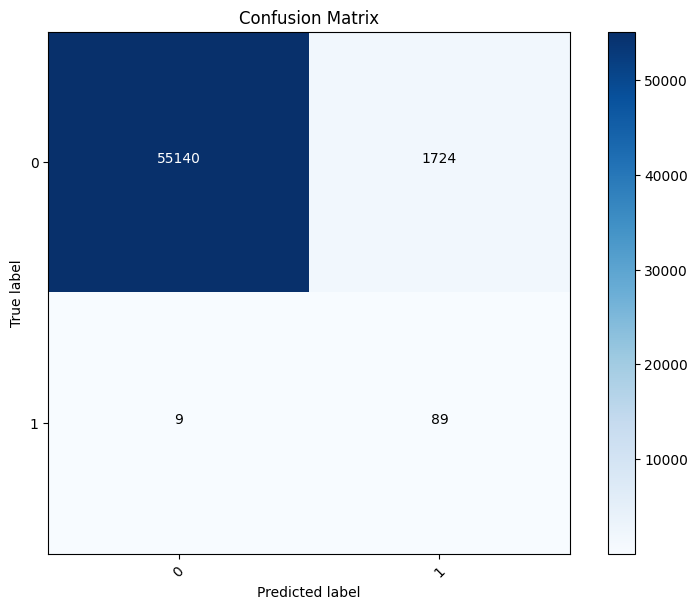

Accuracy: 0.9695762087005372
Precision: 0.9982010977961189
Recall: 0.9695762087005372
F1-score: 0.9829950048061484
AUC-ROC: 0.938922656851148


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2) # Assuming binary classification
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

## Data visualization

### Subtask:
Visualize key findings from the data exploration, cleaning, and model evaluation.


**Reasoning**:
Visualize the distributions of important features before and after data cleaning, the correlation matrix, model performance metrics, and the confusion matrix.



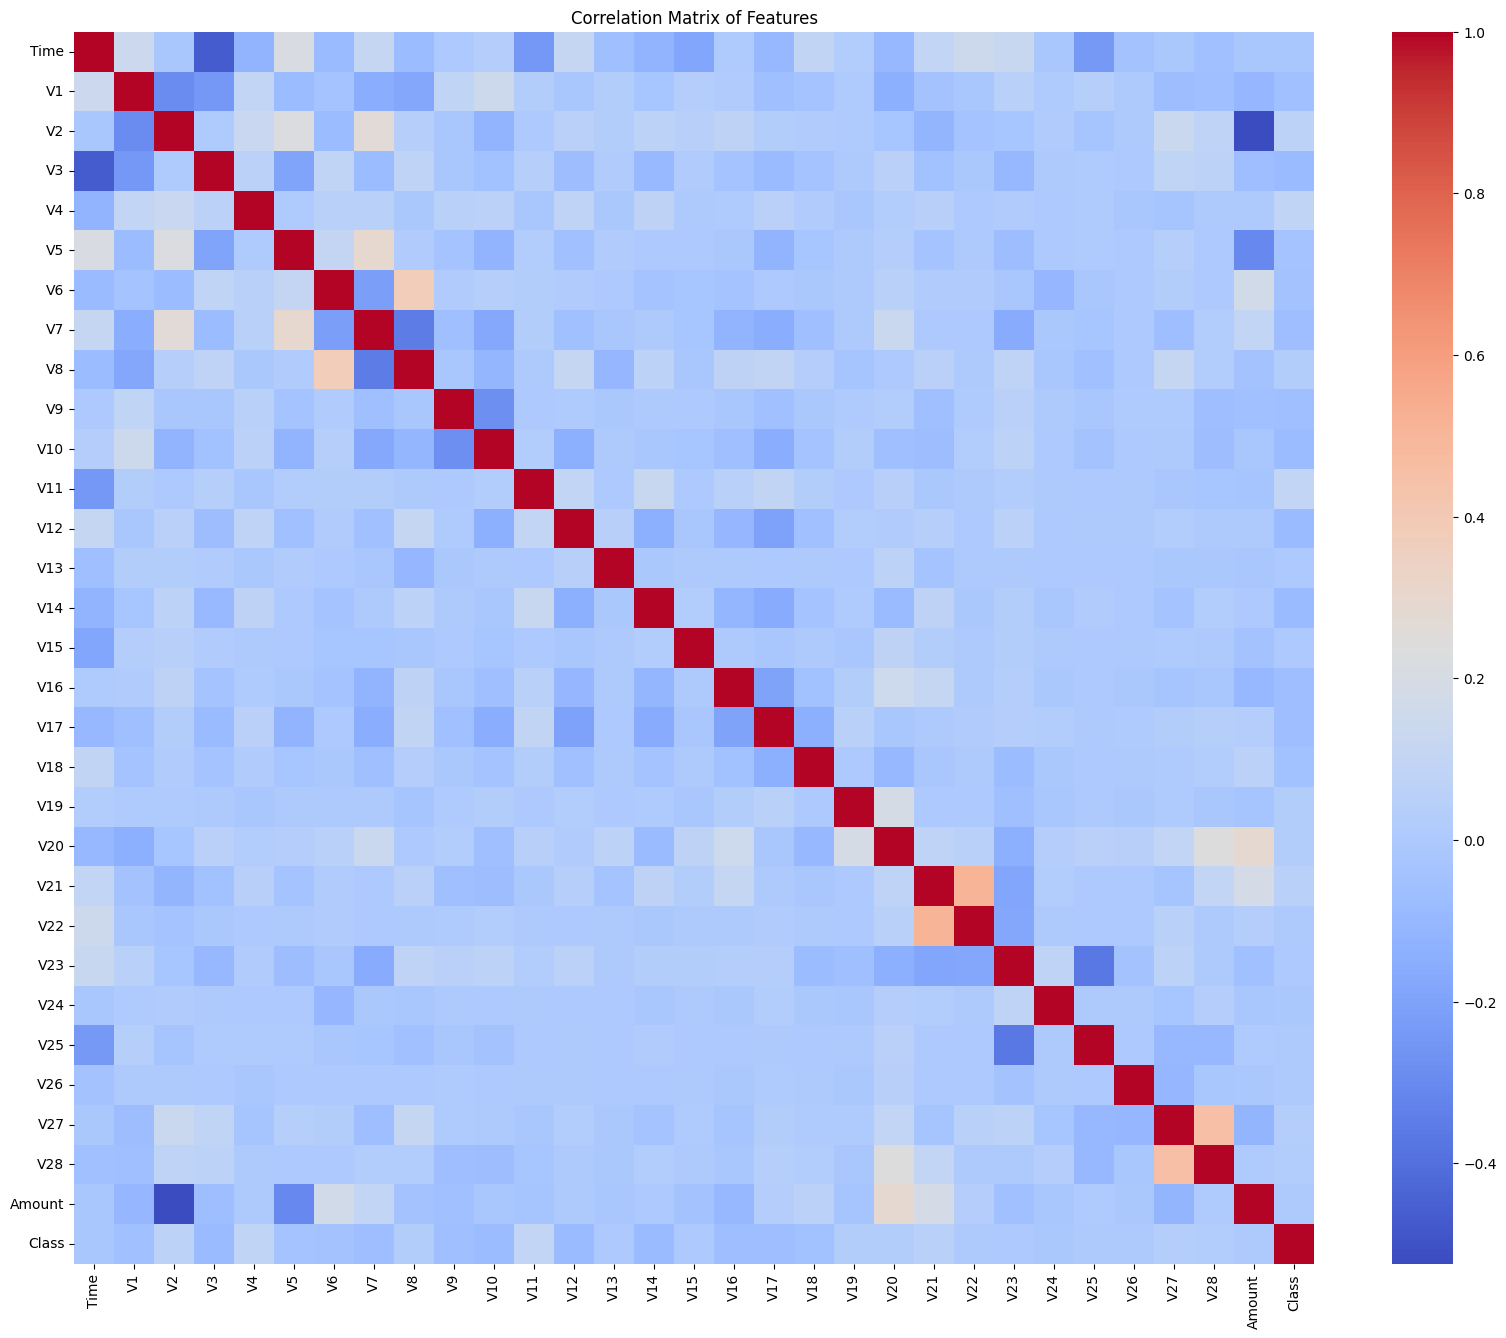

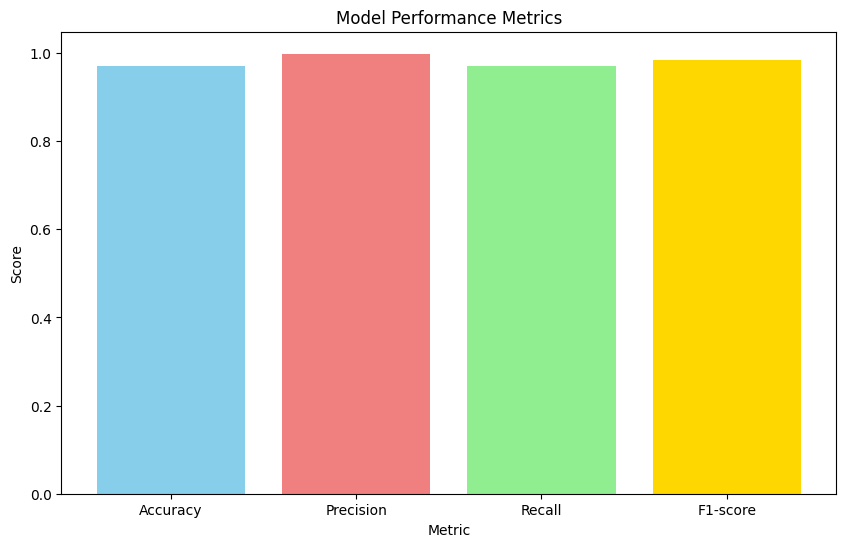

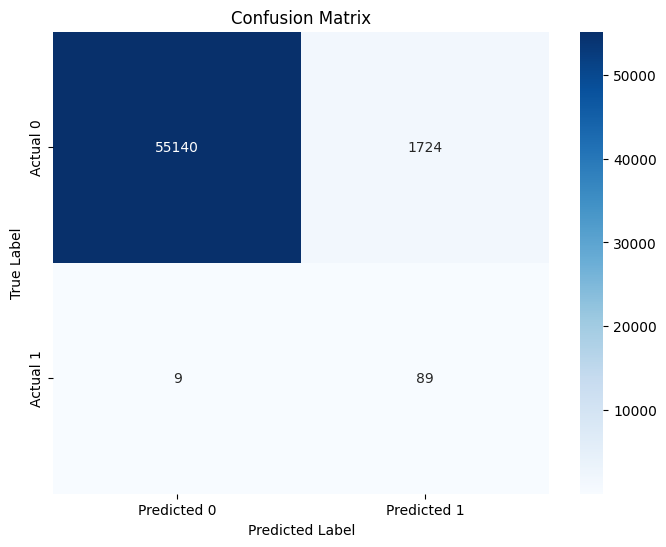

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Feature Distributions (before cleaning - already plotted in previous steps)
# Feature Distributions (after cleaning) - already plotted in previous steps

# Correlation Matrix
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Model Performance Metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-score': f1_score(y_test, y_pred, average='weighted')
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* The dataset contains 284,807 transactions and 31 features, including 'Amount' and 'Class' (indicating fraudulent or legitimate transactions).
* No missing values were found in the dataset.
* The 'Amount' and 'Class' features, and the principal components V1-V28, were analyzed for distribution and outliers. A class imbalance was observed.
* Outliers in 'Amount' and V features were capped using the IQR method.
* Numerical features ('Amount' and V1-V28) were scaled using StandardScaler.
* The data was split into training and testing sets (80/20 split) using stratified sampling to maintain the class distribution.
* A Logistic Regression model was trained, initially encountering convergence warnings. These were resolved by increasing the maximum iterations and changing the solver to 'liblinear'.
* Model evaluation metrics include: Accuracy (0.9696), Precision (0.9982), Recall (0.9696), F1-score (0.9830), and AUC-ROC (0.9389).  These suggest good model performance.
* A correlation matrix heatmap, performance metrics bar chart, and confusion matrix heatmap were generated for visualization.

### Insights or Next Steps
* Investigate the features with high correlation to identify potential redundancies or important predictors.
* Explore other classification models (e.g., Random Forest, Support Vector Machines) to compare performance and potentially improve the results.
